# Визуализация данных в Python
## Домашнее задание

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [159]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Для всей работы использую собственный набор данных 
Данные по потреблению электрической энергии физическими лицами, у которых давно не списывали показания с приборов электрической энергии.
Берутся 2 среза информации: на начало 2019 года и начало 2020 года. 
Столбцы:

year      - год выгрузки данных

user      - потребитель - физическое лицо

region    - город или район

type      - тип подключенного к электроэнергии строения

months    - количество месяцев без списания показаний с прибора учета, может быть пустое поле, если ни разу не списывались данные

In [25]:
raw_data = pd.read_csv('data/6months.csv', sep=';', encoding = "utf-8")

In [26]:
# столбцы: 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194573 entries, 0 to 194572
Data columns (total 5 columns):
year      194573 non-null int64
user      194573 non-null object
region    194573 non-null object
type      194573 non-null object
months    174912 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 5.2+ MB


In [27]:
# преобразование данных и заполнение пропущенных 20 тыс. записей на значение в 6 месяцев: 
raw_data['months'].fillna(6, inplace=True)
raw_data['months'] = raw_data.months.astype('int64')

In [28]:
raw_data.head()

,year,user,region,type,months
0,2020,66300037001,г. Александровск,гараж,56
1,2020,66300022042,г. Александровск,част. ж/дом,62
2,2020,66300022081,г. Александровск,част. ж/дом,34
3,2020,66300267029,г. Александровск,част. ж/дом,54
4,2020,66300061099,г. Александровск,част. ж/дом,51


<BarContainer object of 10 artists>

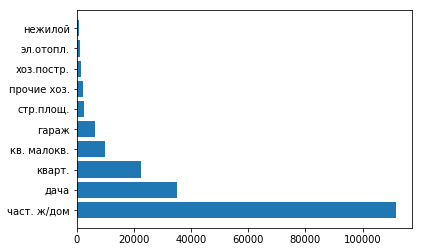

In [45]:
# подсчитаем информацию по типам строений и уберем нижние значения
types = raw_data['type'].value_counts().reset_index().head(10)
plt.barh(types['index'], types['type'])

Вывод: наибольшее количество строений, в которых не списывались показания, это частные жилые дома. 
Все остальные категории в сумме дадут меньшее значение.
Покажем это на круговой диаграмме.

([<matplotlib.patches.Wedge at 0xcd36630>,
 [Text(-0.2642396692244328, 1.0677908958256586, 'част. ж/дом'),
  Text(-0.5433353879945145, -0.9564448003689761, 'дача'),
  Text(0.44657010694469673, -1.005273664025574, 'кварт.'),
  Text(0.8917578673456046, -0.6440247712838529, 'кв. малокв.'),
  Text(1.028947962553057, -0.38892941565008055, 'гараж'),
  Text(1.0742668034136797, -0.23653928866755874, 'стр.площ.'),
  Text(1.0889723244168819, -0.1553681970484746, 'прочие хоз.'),
  Text(1.0962643785520214, -0.09057821105514595, 'хоз.постр.'),
  Text(1.0991247617850297, -0.04387206435765046, 'эл.отопл.'),
  Text(1.0999219645807017, -0.013102359822936727, 'нежилой')])

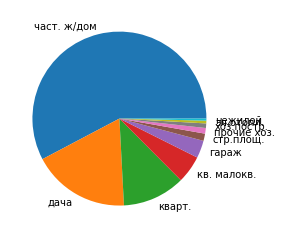

In [49]:
plt.pie(x=types['type'], labels=types['index'])

Единственное, что можно понять, что частные жилые дома занимают более 50%. 

Сравним, насколько изменилось количество потребителей без списания показаний в 2020 году по сравнению с 2019 годом.

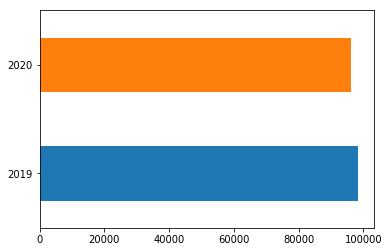

In [62]:
raw_data['year'].value_counts().plot(kind = 'barh')

Получилось не выразительно, покажем на другом графике:

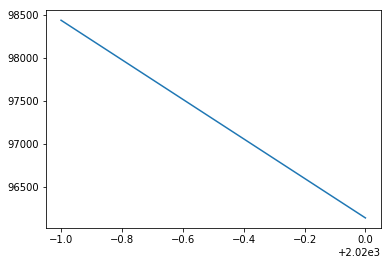

In [70]:
raw_data['year'].value_counts().plot()

Вывод: в 2020 году количество потребителей, у которых не проводилось списание показаний, незначительно снизилось.

Рассмотрим, применим ли такой вывод в разрезе городов и районов (для удобства возьмем только для нас.пунктов свыше 2000 потребителей).

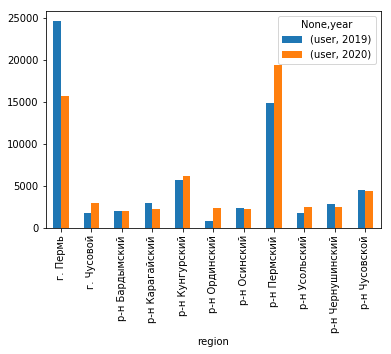

In [158]:
regions = raw_data[['region','year','user']].groupby(['region','year']).count().unstack(['year'])

regions[regions['user'][2020]>2000].plot(kind='bar')


Выводы: 
1. 11 населенных пунктов имеют свыше 2000 потребителей, у которых не проводилось списание показаний 6 мес. и более. Причем в 5 из 11 н.п. кол-во потребителей снизилось по сравнению с 2019 годом. Это положительно характеризует управление данными н.п.

2. В 5 н.п. требуется проведение дополнительных мероприятий по списанию показаний. Наибольший эффект может быть получен в Пермском районе. 

### Для применения seaborn берется набор данных по оценке книг.

Структура данных: 2 файла 
- BX-Book-Ratings - рейтинги книг
- BX-Books - данные о книгах

In [177]:
ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=';', encoding = 'ISO-8859-1')
books = pd.read_csv('data/BX-Books.csv', sep=';', encoding = 'ISO-8859-1')

In [178]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.9+ MB


In [179]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271357 entries, 0 to 271356
Data columns (total 8 columns):
ISBN                   271357 non-null object
Book-Title             271357 non-null object
Book-Author            271356 non-null object
Year-Of-Publication    271357 non-null int64
Publisher              271355 non-null object
Image-URL-S            271357 non-null object
Image-URL-M            271357 non-null object
Image-URL-L            271357 non-null object
dtypes: int64(1), object(7)
memory usage: 9.3+ MB


In [204]:
ratings_grouped = ratings.groupby('ISBN').agg({'User-ID':'count','Book-Rating':'mean'}).reset_index() #группируем по книгам
ratings_grouped = ratings_grouped[ratings_grouped['User-ID']>10] # оставляем только оценки для книг от 10 оценок
ratings_grouped.head()

,ISBN,User-ID,Book-Rating
62,000000000,14,0.500000
231,0002005018,14,4.928571
513,0002251760,13,4.846154
607,0002259001,15,5.000000
619,0002259834,12,4.583333


In [205]:
# берем из books столбец с годом выпуска книги, автором и названием
ratings_books = pd.merge(ratings_grouped, books[['ISBN','Year-Of-Publication','Book-Title','Book-Author']], on='ISBN')
# убираем все книги с отсутствующим годом выпуска (в файле установлен равным 0)
ratings_books = ratings_books[ratings_books['Year-Of-Publication']>1990]
ratings_books.sort_values(by = ['Book-Rating'], ascending = False, inplace = True)
ratings_books.head()

,ISBN,User-ID,Book-Rating,Year-Of-Publication,Book-Title,Book-Author
2237,3551551936,12,8.000000,1999,Harry Potter Und Der Feuerkelch,Joanne K. Rowling
1757,1844262553,54,7.962963,2003,Free,Paul Vincent
2328,8478886451,16,7.875000,2001,Harry Potter y el cÃ¡liz de fuego,J. K. Rowling
2050,3423071516,15,7.800000,2002,Der Kleine Hobbit,J. R. R. Tolkien
1693,1577780728,15,7.533333,1999,Jesus Freaks: DC Talk and The Voice of the Mar...,DC Talk


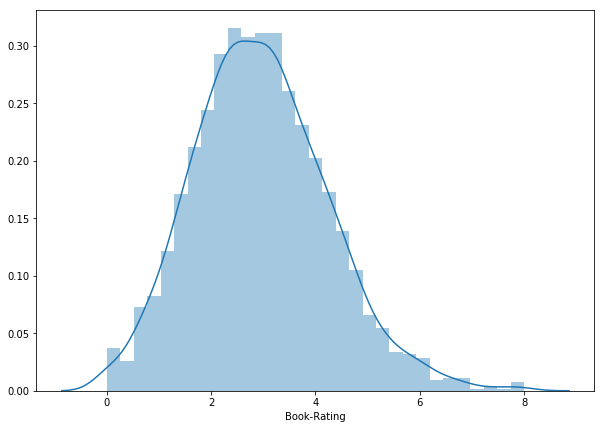

In [212]:
sns.distplot(ratings_books['Book-Rating'])
# получили нормальное распределение

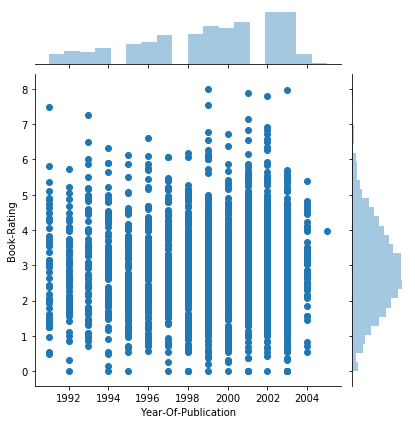

In [213]:
sns.jointplot(x='Year-Of-Publication', y='Book-Rating',data=ratings_books, kind='scatter')
# сложно сделать вывод из такого графика

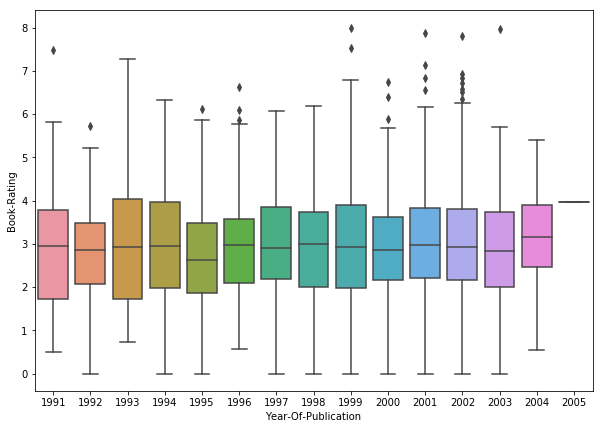

In [215]:
sns.boxplot(x='Year-Of-Publication', y='Book-Rating', data=ratings_books)
# сложно сделать какой-либо конкретный вывод из такого графика,
# разве что рейтинг у книг средний очень низкий :) 